# Notebook used for Testing the Data Cleaning

In [1]:
import numpy as np
import json
import pandas as pd
from urllib.request import urlopen
import scipy.optimize
import random
from collections import defaultdict
import nltk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import random
from statistics import mode
from sklearn import svm
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

Rename columns in dataset based on the following key:

In [2]:
# Read in the dataset
df = pd.read_csv("Questionnaire_Responses.csv")
rename_columns = ["time_submitted", "location", "major", "curr_activity_level", "past_activity_level",
              "exercise_importance", "prior_athlete", "sport_history", "exercise_locations",
              "off_campus_gym_freq", "avg_commute_mwf_off_campus", "avg_commute_tth_off_campus",
              "avg_commute_ss_off_campus", "commute_challenges_mwf_off_campus",
              "commute_challenges_tth_off_campus", "commute_challenges_ss_off_campus",
              "transportation_mwf_off_campus", "transportation_tth_off_campus", "transportation_ss_off_campus",
              "on_campus_gym_freq","avg_commute_mwf_on_campus", "avg_commute_tth_on_campus",
              "avg_commute_ss_on_campus", "commute_challenges_mwf_on_campus",
              "commute_challenges_tth_on_campus", "commute_challenges_ss_on_campus",
              "transportation_mwf_on_campus", "transportation_tth_on_campus", "transportation_ss_on_campus",
              "mwf_passing_gym", "tth_passing_gym", "ss_passing_gym", "main_gym_location","gen_gym_locations",
              "proximity_importance", "equipment_importance", "time_importance", "class_importance",
              "friends_importance", "student_athlete_importance", "other_importance", "main_motivator",
              "attend_gym_times", "email"]
key = zip(df.columns, rename_columns)

In [3]:
#KEY of questions and columns
for i in key:
    print(i)

('Timestamp', 'time_submitted')
('Where do you live?', 'location')
("What's your major?", 'major')
('How would you rank your level of activity in regards to exercising PRESENTLY?', 'curr_activity_level')
('How would you rank your level of activity in regards to exercising BEFORE UCSD?', 'past_activity_level')
('How important is exercising to you?', 'exercise_importance')
('Were/Are you a competitive athlete or dancer? CHECK ALL THAT APPLY.', 'prior_athlete')
('If yes, what sport(s) did you do?', 'sport_history')
('How/Where do you usually exercise? CHECK ALL THAT APPLY.', 'exercise_locations')
('How often do you use the gyms OFF campus?', 'off_campus_gym_freq')
('How long does it usually take you to get to the gym OFF campus? ONE ANSWER PER ROW [Mon, Wed, Fri]', 'avg_commute_mwf_off_campus')
('How long does it usually take you to get to the gym OFF campus? ONE ANSWER PER ROW [Tues, Thurs]', 'avg_commute_tth_off_campus')
('How long does it usually take you to get to the gym OFF campus? 

In [4]:
df.columns = rename_columns
df

,time_submitted,location,major,curr_activity_level,past_activity_level,exercise_importance,prior_athlete,sport_history,exercise_locations,off_campus_gym_freq,...,proximity_importance,equipment_importance,time_importance,class_importance,friends_importance,student_athlete_importance,other_importance,main_motivator,attend_gym_times,email
0,5/14/2019 23:58:03,Revelle,Physiology&Neuroscience,"Contemplation - currently not doing exercise, ...",Contemplation - did not exercise but intended ...,4,No,NaN,"At an on campus gym (Main Gym, RIMAC, Spanos, ...",NaN,...,7.0,5.0,6.0,2.0,3.0,1.0,4.0,to feel better emotionally & physically,"Evening (4PM - 7PM), I don't go to the gym.",jrgruver@ucsd.edu
1,5/15/2019 0:16:33,Marshall,Ecology Behavior and Evolution (EBE),"Contemplation - currently not doing exercise, ...",Preparation - exercised infrequently,6,"Yes, in high school",Swim team and track and field,"At an on campus gym (Main Gym, RIMAC, Spanos, ...",NaN,...,7.0,5.0,4.0,1.0,6.0,2.0,3.0,to be healthy,"Evening (4PM - 7PM), Night (8PM - 12AM), I don...",lcarlson@ucsd.edu
2,5/15/2019 0:26:17,Muir,Human Health Psychology,"Contemplation - currently not doing exercise, ...",Maintenance - regularly exercising for 6 month...,7,"Yes, in high school",Color guard,"At an on campus gym (Main Gym, RIMAC, Spanos, ...",NaN,...,7.0,6.0,4.0,2.0,5.0,1.0,NaN,Being healthy and losing weight,"Evening (4PM - 7PM), Night (8PM - 12AM)",lmaraan@ucsd.edu
3,5/15/2019 0:31:37,I don't live on campus,Human Bio,Preparation - doing exercise but not regularly,Maintenance - regularly exercising for 6 month...,8,"Yes, in high school","Vball, soccer",Off Campus,1 or 2 times a week,...,7.0,6.0,4.0,5.0,3.0,1.0,2.0,NaN,"Late Morning (9AM - 11AM), Afternoon (12PM - 3...",morel@ucsd.edu
4,5/15/2019 0:35:18,Marshall,Human Biology,"Contemplation - currently not doing exercise, ...",Action - regularly exercised but for less than...,8,No,NaN,"At an on campus gym (Main Gym, RIMAC, Spanos, ...",NaN,...,1.0,5.0,2.0,6.0,4.0,7.0,3.0,Maintain health,"Afternoon (12PM - 3PM), Evening (4PM - 7PM)",cjt025@ucsd.edu
5,5/15/2019 0:37:27,I don't live on campus,Human Biology,Priority - intensive exercise multiple times a...,Precontemplation - did not exercise at all,8,"Yes, in high school, Yes, in college","Water Polo/Swim in High School, Dragon Boat in...","At an on campus gym (Main Gym, RIMAC, Spanos, ...",Never,...,5.0,7.0,6.0,4.0,2.0,3.0,1.0,Get Stronger/better physique,"Late Morning (9AM - 11AM), Afternoon (12PM - 3...",ringle@ucsd.edu
6,5/15/2019 0:37:55,I don't live on campus,Chemical Engineering,"Contemplation - currently not doing exercise, ...",Preparation - exercised infrequently,5,No,NaN,Off Campus,Never,...,7.0,3.0,5.0,4.0,2.0,1.0,6.0,I don't go to the gym.,I don't go to the gym.,jas139@ucsd.edu
7,5/15/2019 0:44:34,I don't live on campus,EBE,Priority - intensive exercise multiple times a...,Maintenance - regularly exercising for 6 month...,8,No,NaN,"Off Campus, Sports (IM, Club, Division)",3 or 4 times a week,...,5.0,3.0,4.0,7.0,2.0,1.0,6.0,NaN,Evening (4PM - 7PM),NaN
8,5/15/2019 1:01:20,I don't live on campus,public health,"Contemplation - currently not doing exercise, ...",Preparation - exercised infrequently,7,"Yes, in high school",tennis,"At an on campus gym (Main Gym, RIMAC, Spanos, ...",Never,...,5.0,7.0,6.0,1.0,4.0,3.0,2.0,"health, body image","Night (8PM - 12AM), I don't go to the gym.",p9phan@ucsd.edu
9,5/15/2019 1:01:58,I don't live on campus,Biochem/Chem,Maintenance - regularly exercising for 6 month...,Preparation - exercised infrequently,7,"Yes, in high school, Yes, in college","Wrestling, Jiu Jitsu","At an on campus gym (Main Gym, RIMAC, Spanos, ...",1 or 2 times a week,...,3.0,5.0,4.0,1.0,7.0,6.0,2.0,Fitness/Competition,"Early Morning (4AM - 8AM), Evening (4PM - 7PM)",ajr062@ucsd.edu


Clean majors into different categories (STEM, Humanities, and Social Science)

In [5]:
'''
Categorizes majors into:
    - STEM: Science, Technology, Engineering, and Math
    - HUM: Humanities
    - SS: Social Science
    - OTH: Other (undeclared)
'''

def clean_job (title):
    title = title.lower()
    title = title.strip()
    
    stem = ['computer science', 'human bio', 'ebe', 'chem', 'biology', 'engineer', 'cog',
            'neuro', 'computer ascience', 'cbn', 'cs', 'math', 'ecology', 'ciomp sci']
    hum = ['icam', 'history']
    ss = ['psych', 'management science', 'public health', 'human development',
          'international business', 'communucation', 'poli sci', 'urban studies']
    
    output = "OTH"
    
    for label in stem:
        if label in title:
            output = "STEM"

    for label in hum:
        if label in title:
            output = "HUM"
        
    for label in ss:
        if label in title:
            output = "SS"
        
    return output

In [6]:
def clean_on_campus_freq (frequency):
    frequency = frequency.lower()
    frequency = frequency.strip()
    
    if 'never' in frequency:
        output = 0
    elif 'month' in frequency:
        output = 1
    elif '5' in frequency:
        output = 5
    elif '3' in frequency:
        output = 4
    elif '1' in frequency:
        output = 3
    elif 'week' in frequency:
        output = 2
        
    return output

In [7]:
df['major'] = df['major'].apply(clean_job)
df['on_campus_gym_freq'] = df['on_campus_gym_freq'].apply(clean_on_campus_freq)

In [8]:
#Noticing the skew in majors... that might be something that we want
#to point out in our data analysis. Not getting representation from
#humanities majors, but also I put cog sci under stem (can be ss or stem)
#and I put public health under ss (can be ss or stem)
df['major'].value_counts()
df['on_campus_gym_freq'].value_counts()

4    29
3    27
1    23
0    18
2    15
5     8
Name: on_campus_gym_freq, dtype: int64

# Visualizations

### Importance vs. On-Campus-Freq

In [9]:
def drop_no_importance(df):
    importance = df.dropna(subset=["proximity_importance", "equipment_importance", "time_importance", "class_importance",
              "friends_importance", "student_athlete_importance", "other_importance"])
    
    return importance

In [10]:
importance = drop_no_importance(df)

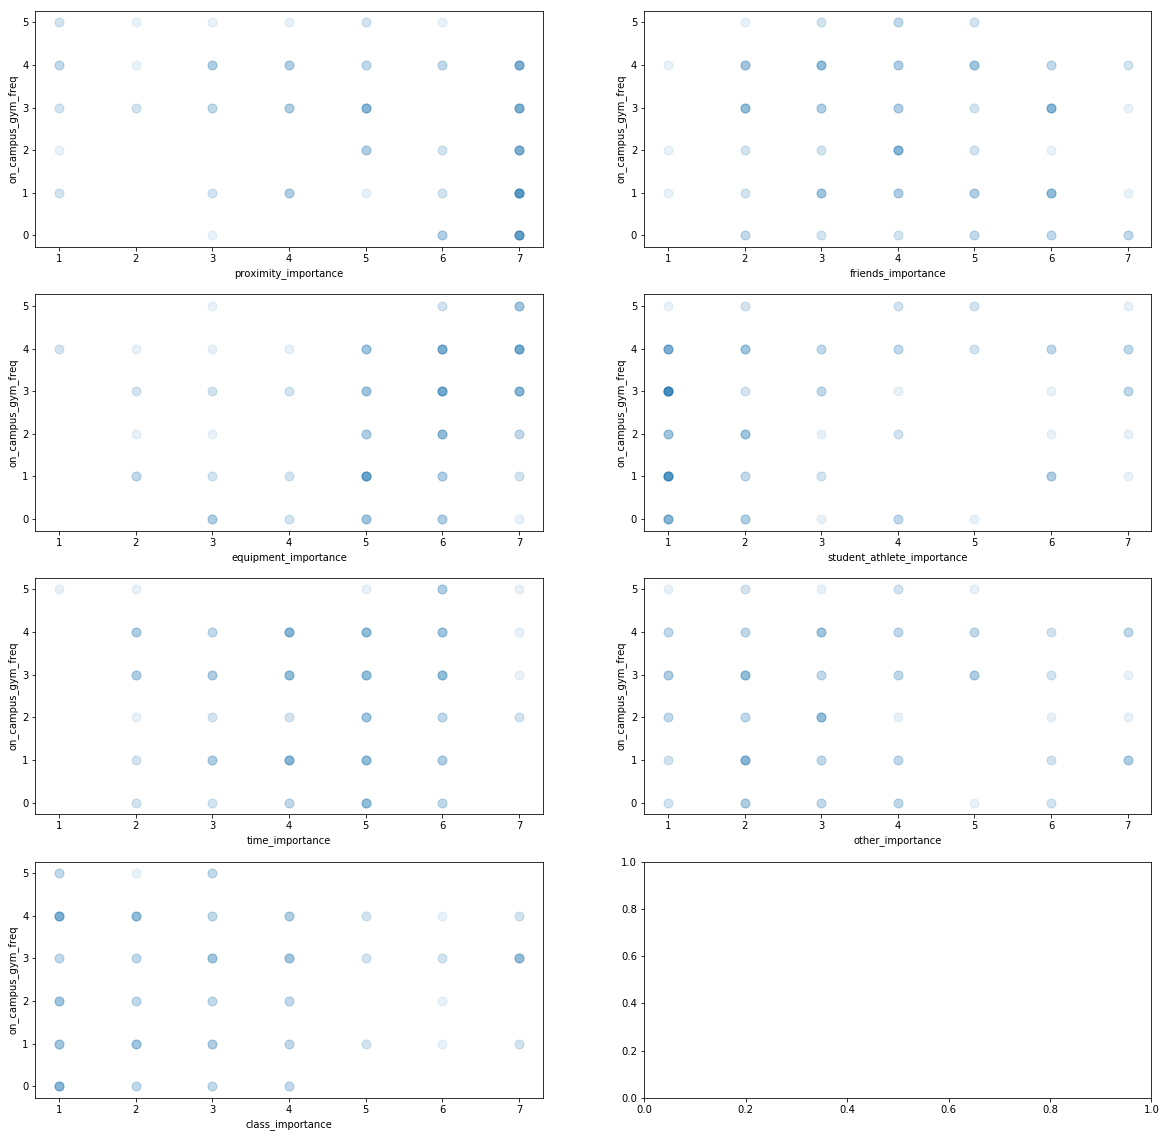

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,20))
axes[0][0].scatter(df['proximity_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[0][0].set_xlabel("proximity_importance")
axes[0][0].set_ylabel("on_campus_gym_freq")

axes[1][0].scatter(df['equipment_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[1][0].set_xlabel("equipment_importance")
axes[1][0].set_ylabel("on_campus_gym_freq")

axes[2][0].scatter(df['time_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[2][0].set_xlabel("time_importance")
axes[2][0].set_ylabel("on_campus_gym_freq")

axes[3][0].scatter(df['class_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[3][0].set_xlabel("class_importance")
axes[3][0].set_ylabel("on_campus_gym_freq")

axes[0][1].scatter(df['friends_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[0][1].set_xlabel("friends_importance")
axes[0][1].set_ylabel("on_campus_gym_freq")

axes[1][1].scatter(df['student_athlete_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[1][1].set_xlabel("student_athlete_importance")
axes[1][1].set_ylabel("on_campus_gym_freq")

axes[2][1].scatter(df['other_importance'], df['on_campus_gym_freq'], s=80, alpha=0.1)
axes[2][1].set_xlabel("other_importance")
axes[2][1].set_ylabel("on_campus_gym_freq")

plt.show()

### Location vs. On-Campus-Freq

In [12]:
revelle = df[df['location'] == 'Revelle']
marshall = df[df['location'] == 'Marshall']
muir = df[df['location'] == 'Muir']
warren = df[df['location'] == 'Warren']
sixth = df[df['location'] == 'Sixth']
erc = df[df['location'] == 'ERC']
village = df[df['location'] == 'The Village']
off = df[df['location'] == 'I don\'t live on campus']

In [13]:
revelle_freq = revelle['on_campus_gym_freq'].mean()
marshall_freq = marshall['on_campus_gym_freq'].mean()
muir_freq = muir['on_campus_gym_freq'].mean()
warren_freq = warren['on_campus_gym_freq'].mean()
sixth_freq = sixth['on_campus_gym_freq'].mean()
erc_freq = erc['on_campus_gym_freq'].mean()
village_freq = village['on_campus_gym_freq'].mean()
off_freq = off['on_campus_gym_freq'].mean()

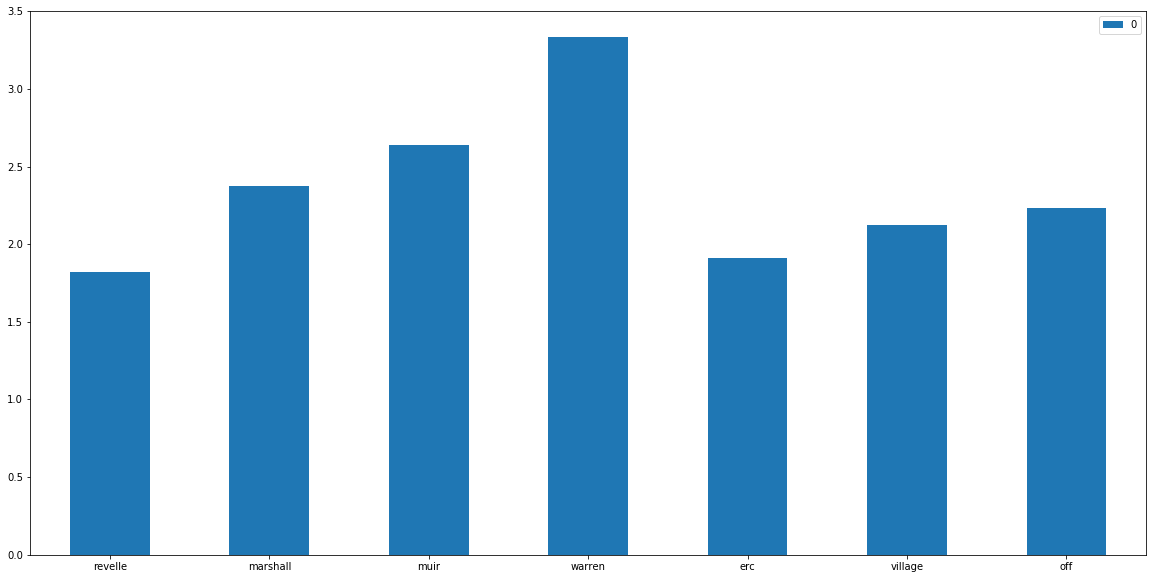

In [14]:
location_on_freq = pd.DataFrame({revelle_freq, marshall_freq, muir_freq, warren_freq, erc_freq, village_freq, off_freq})
labels = ('revelle', 'marshall', 'muir', 'warren', 'erc', 'village', 'off')
ax = location_on_freq.plot.bar(rot=0,figsize=(20,10))
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)
plt.show()

In [15]:
print(revelle_freq)
print(marshall_freq)
print(muir_freq)
print(warren_freq)
print(sixth_freq)
print(erc_freq)
print(village_freq)
print(off_freq)

1.8181818181818181
1.9090909090909092
2.6363636363636362
3.3333333333333335
2.8333333333333335
2.375
2.125
2.2325581395348837


### Commute challenges vs. On-Campus-Freq

In [16]:
#"commute_challenges_mwf_on_campus", "commute_challenges_tth_on_campus", "commute_challenges_ss_on_campus"
def clean_challenges (row):
    cleaned = ''
    for entry in [row["commute_challenges_mwf_on_campus"], row["commute_challenges_tth_on_campus"],
                  row["commute_challenges_ss_on_campus"]]:
        if entry is np.nan:
            cleaned += 'X'
            continue
        if 'uphill' in entry:
            cleaned += 'U'
        if 'stair' in entry:
            cleaned += 'S'
    return cleaned

In [17]:
df = df.loc[df['location'] != "I don\'t live on campus"]
challenge = df
challenge['week_challenge'] = challenge.apply(lambda row: clean_challenges(row), axis=1)

C:\Users\lebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
none = challenge[challenge['week_challenge'].str.contains("XXX")]
uphill = challenge[challenge['week_challenge'].str.contains("U")]
stairs = challenge[challenge['week_challenge'].str.contains("S")]

In [19]:
none_freq = none['on_campus_gym_freq'].mean()
uphill_freq = uphill['on_campus_gym_freq'].mean()
stairs_freq = stairs['on_campus_gym_freq'].mean()

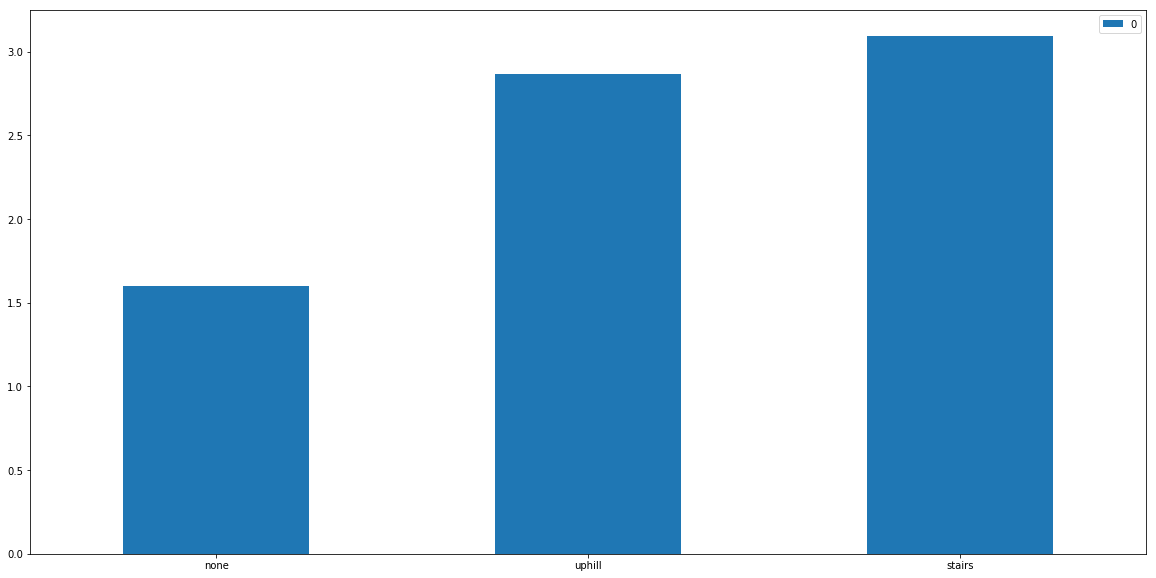

In [20]:
challenge_on_freq = pd.DataFrame({none_freq, uphill_freq, stairs_freq})
labels = ('none', 'uphill', 'stairs')
ax = challenge_on_freq.plot.bar(rot=0,figsize=(20,10))
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)
plt.show()

### avg_commute_on_campus vs. on-campus-freq

In [21]:
def clean_commute(commute):
    if commute is np.nan:
        return 0
    if '25' in commute:
        return 5
    elif '16' in commute:
        return 4
    elif '11' in commute:
        return 3
    elif '6' in commute:
        return 2
    elif '5' in commute:
        return 1

In [22]:
def avg_commute(row):
    mwf = row['avg_commute_mwf_on_campus']
    tth = row['avg_commute_tth_on_campus']
    ss = row['avg_commute_ss_on_campus']
    week = 3*mwf + 2*tth + 2*ss
    week = week/7
    return week

In [23]:
df['avg_commute_mwf_on_campus'] = df['avg_commute_mwf_on_campus'].apply(clean_commute)
df['avg_commute_tth_on_campus'] = df['avg_commute_tth_on_campus'].apply(clean_commute)
df['avg_commute_ss_on_campus'] = df['avg_commute_ss_on_campus'].apply(clean_commute)
df['week_commute'] = df.apply(lambda row: avg_commute(row), axis=1)

C:\Users\lebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

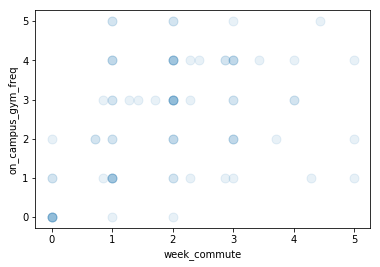

In [24]:
plt.scatter(df['week_commute'], df['on_campus_gym_freq'],s=80, alpha=0.1)
plt.xlabel("week_commute")
plt.ylabel("on_campus_gym_freq")
plt.show()

### main_gym_locations vs locations

In [25]:
# Revelle, Muir, Marshall, Warren, ERC, Sixth, The Village
# Main gym, RIMAC, Keeling, Canyon View, Spanos
def distance_correl(row):
    location = row['location']
    gym = row['main_gym_location']
    if (location, gym) in [('The Village', 'Spanos'), ('The Village', 'RIMAC'),
                           ('ERC', 'RIMAC'), ('Revelle', 'Keeling Gym'), ('Warren', 'Canyon View'),
                           ('Muir', 'Main Gym'), ('Marshall', 'Main Gym'), ('Marshall', 'RIMAC')]:
        return 1
    elif (location, gym) in [('Sixth', 'Canyon View'), ('Revelle', 'Main Gym'), ('Muir', 'Keeling Gym'), ('Muir', 'RIMAC'),
                             ('ERC', 'Spanos'), ('ERC', 'Main Gym'), ('Marshall', 'Spanos'), ('The Village', 'Main Gym')]:
        return 2
    elif (location, gym) in [('Warren', 'RIMAC'), ('Revelle', 'RIMAC'), ('Marshall', 'Canyon View'),
                             ('Marshall', 'Keeling Gym'), ('The Village', 'Canyon View')]:
        return 3
    elif (location, gym) in [('Warren', 'Main Gym'), ('Sixth', 'Keeling Gym'), ('ERC', 'Canyon View')]:
        return 4
    else:
        return 5

In [26]:
df['distance_correl'] = df.apply(lambda row: distance_correl(row), axis=1)
df = df[df['location'] != 'I don\'t live on campus']

C:\Users\lebel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


plt.scatter(df['distance_correl'], df['on_campus_gym_freq'],s=80, alpha=0.1)
plt.xlabel("distance_correlation")
plt.ylabel("on_campus_gym_freq")
plt.show()

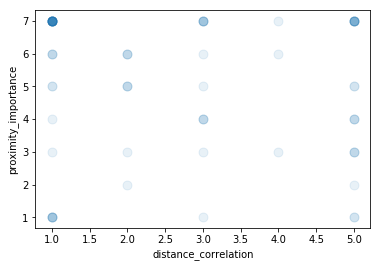

In [27]:
plt.scatter(df['distance_correl'], df['proximity_importance'],s=80, alpha=0.1)
plt.xlabel("distance_correlation")
plt.ylabel("proximity_importance")
plt.show()

In [28]:
pairs = df[['location','main_gym_location']]
rev_gyms = pairs[pairs['location'] == 'Revelle']
muir_gyms = pairs[pairs['location'] == 'Muir']
mar_gyms = pairs[pairs['location'] == 'Marshall']
war_gyms = pairs[pairs['location'] == 'Warren']
erc_gyms = pairs[pairs['location'] == 'ERC']
six_gyms = pairs[pairs['location'] == 'Sixth']
vil_gyms = pairs[pairs['location'] == 'The Village']

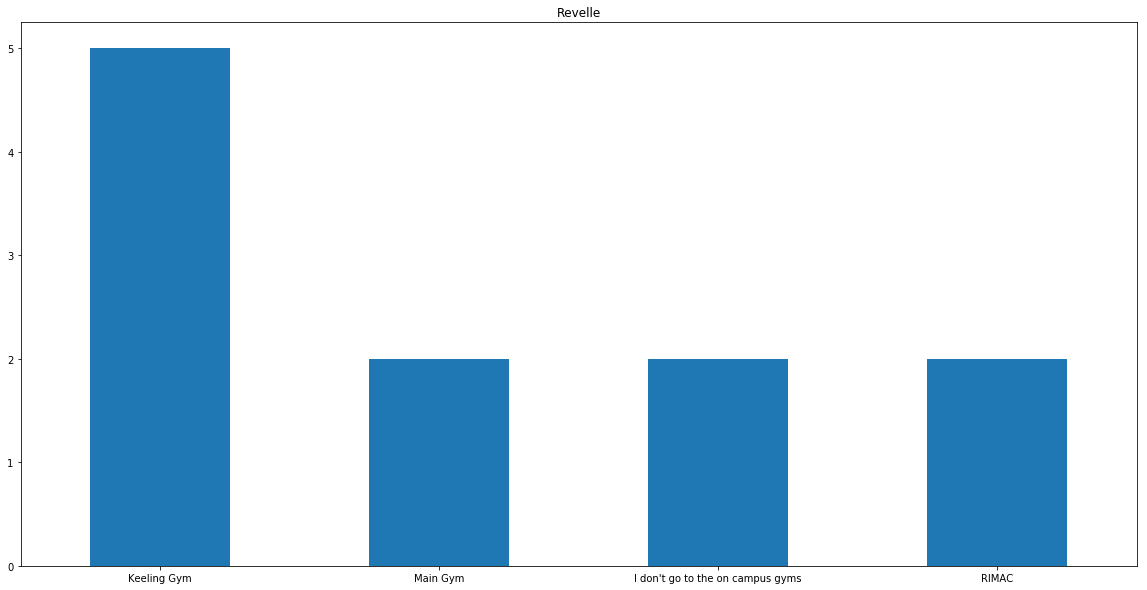

In [29]:
pairs_rev = rev_gyms['main_gym_location'].value_counts()
ax = pairs_rev.plot.bar(rot=0,figsize=(20,10),title='Revelle')
plt.show()

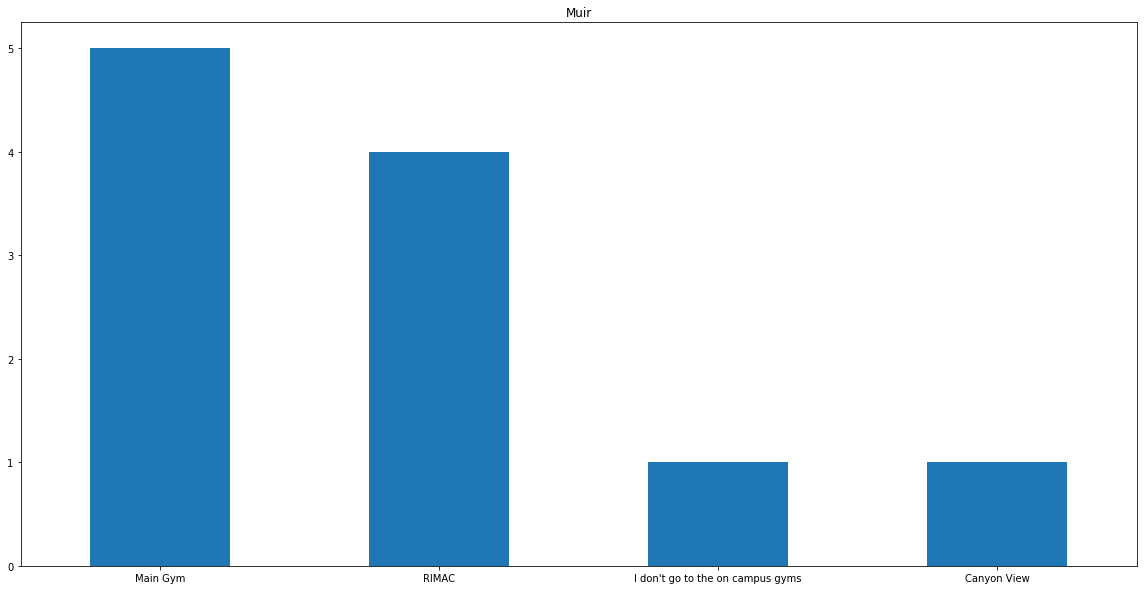

In [30]:
pairs_muir = muir_gyms['main_gym_location'].value_counts()
ax = pairs_muir.plot.bar(rot=0,figsize=(20,10),title='Muir')
plt.show()

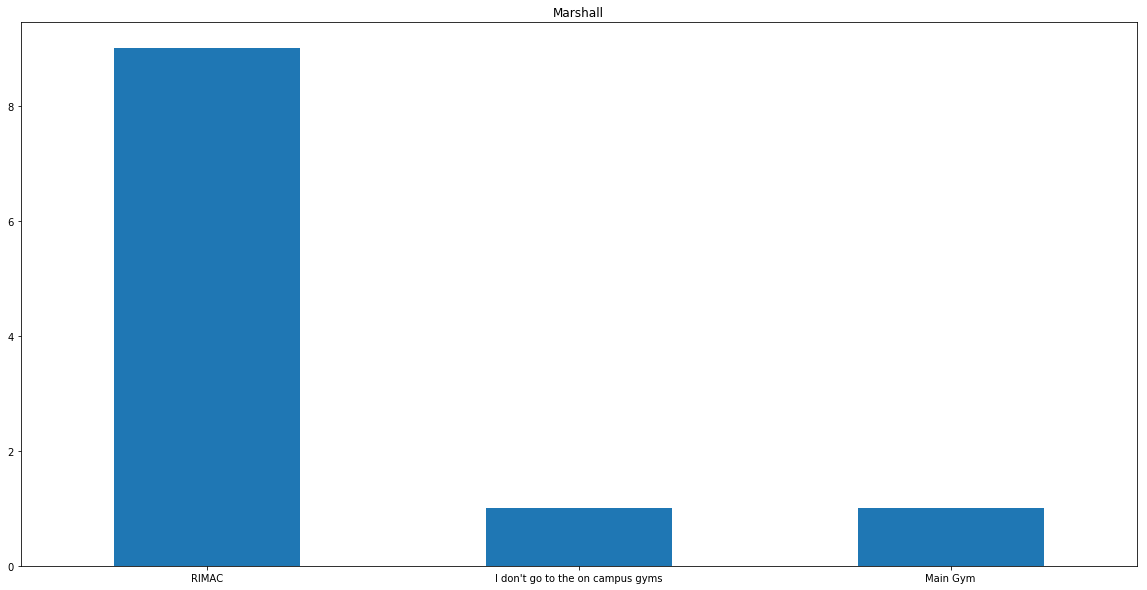

In [31]:
pairs_mar = mar_gyms['main_gym_location'].value_counts()
ax = pairs_mar.plot.bar(rot=0,figsize=(20,10),title='Marshall')
plt.show()

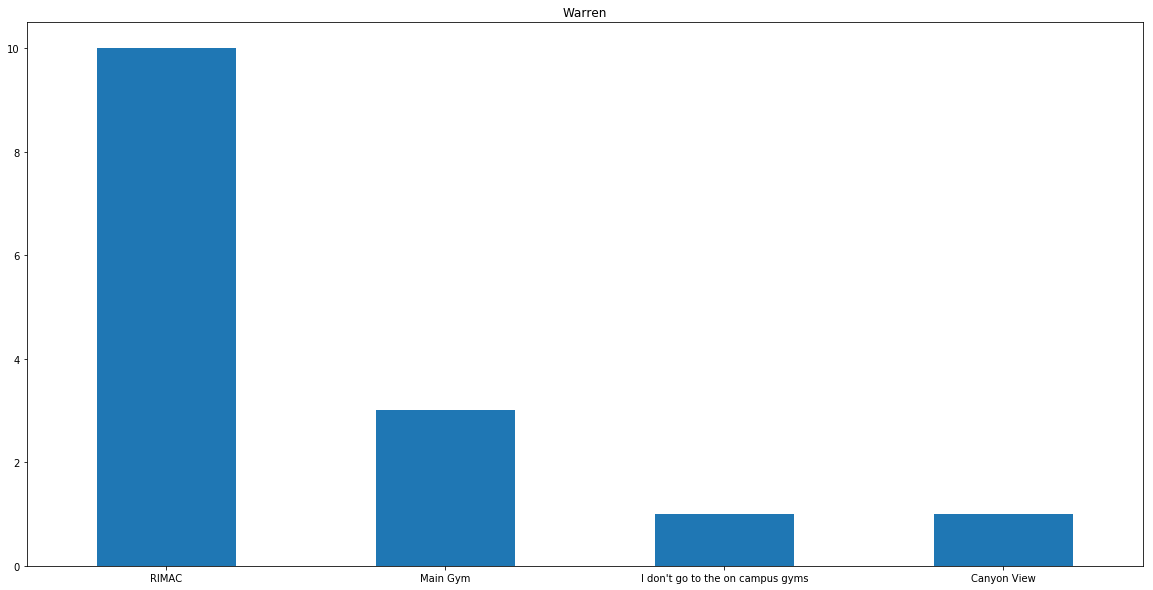

In [32]:
pairs_war = war_gyms['main_gym_location'].value_counts()
ax = pairs_war.plot.bar(rot=0,figsize=(20,10),title='Warren')
plt.show()

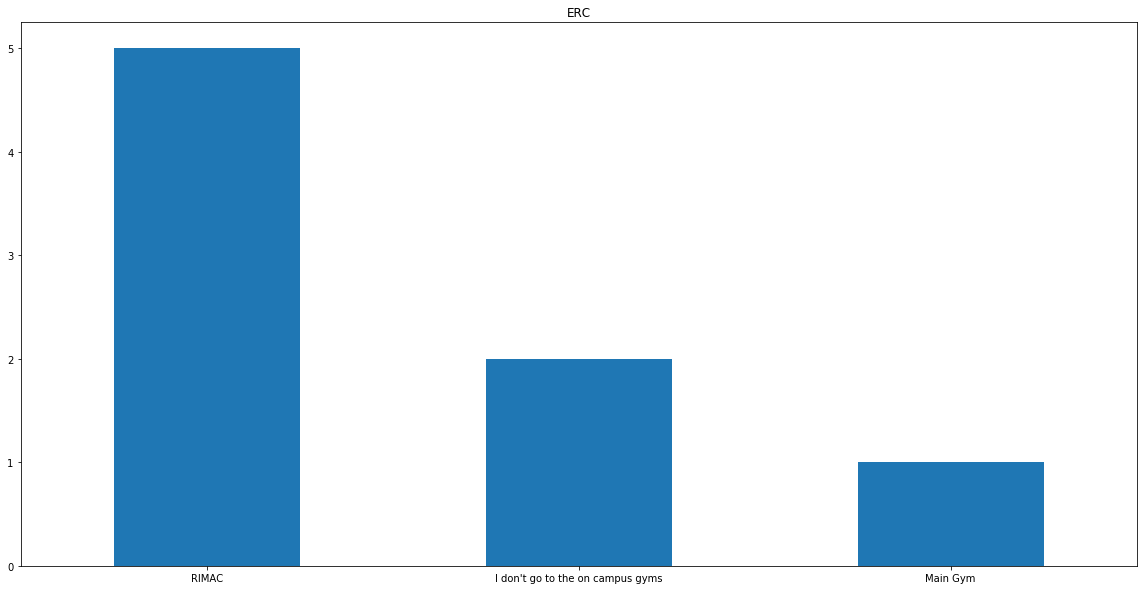

In [33]:
pairs_erc = erc_gyms['main_gym_location'].value_counts()
ax = pairs_erc.plot.bar(rot=0,figsize=(20,10),title='ERC')
plt.show()

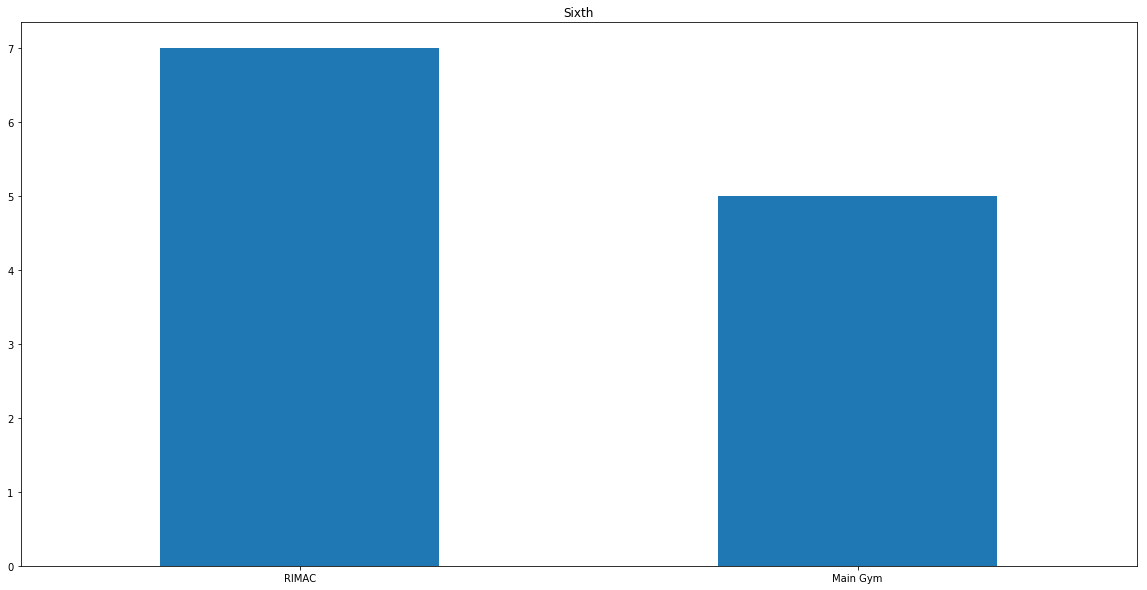

In [34]:
pairs_six = six_gyms['main_gym_location'].value_counts()
ax = pairs_six.plot.bar(rot=0,figsize=(20,10),title='Sixth')
plt.show()

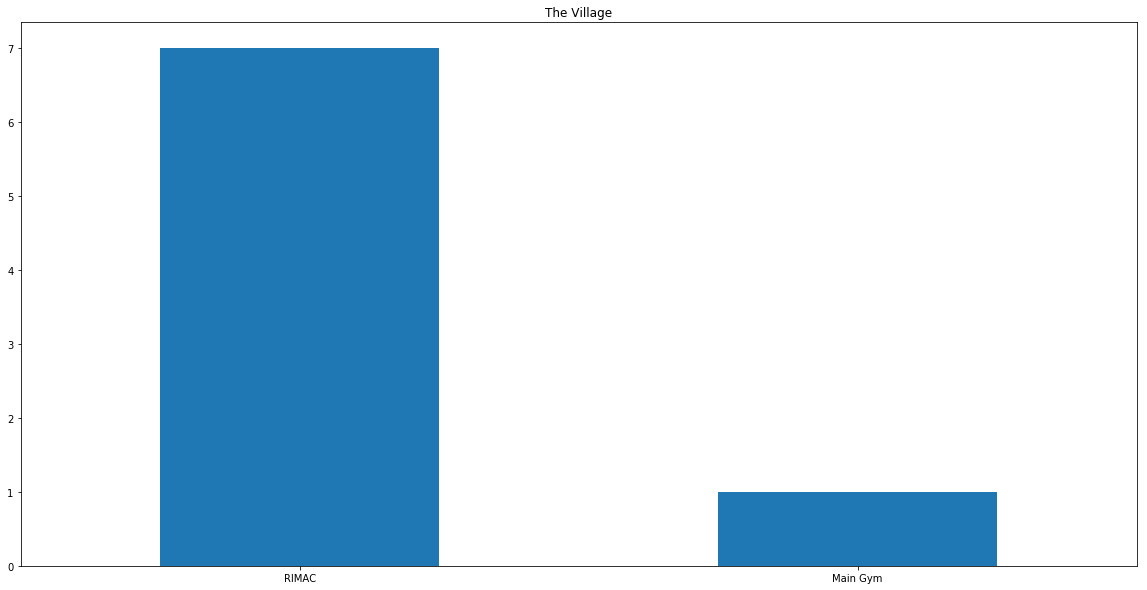

In [35]:
pairs_vil = vil_gyms['main_gym_location'].value_counts()
ax = pairs_vil.plot.bar(rot=0,figsize=(20,10),title='The Village')
plt.show()

### Passing gyms vs. On campus freq

In [36]:
def clean_passing(passing):
    
    if '9' in passing:
        output = 5
    elif '5' in passing:
        output = 4
    elif '3' in passing:
        output = 3
    elif '1' in passing:
        output = 1
    elif '0' in passing:
        output = 0
        
    return output

In [37]:
def avg_passing(row):
    mwf = row['mwf_passing_gym']
    tth = row['tth_passing_gym']
    ss = row['ss_passing_gym']
    week = 3*mwf + 2*tth + 2*ss
    week = week/7
    return week

In [38]:
df['mwf_passing_gym'] = df['mwf_passing_gym'].apply(clean_passing)
df['tth_passing_gym'] = df['tth_passing_gym'].apply(clean_passing)
df['ss_passing_gym'] = df['ss_passing_gym'].apply(clean_passing)

In [39]:
df['week_passing'] = df.apply(lambda row: avg_passing(row), axis=1)

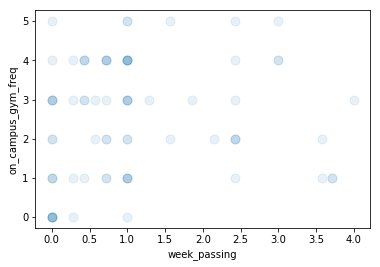

In [40]:
plt.scatter(df['week_passing'], df['on_campus_gym_freq'],s=80, alpha=0.1)
plt.xlabel("week_passing")
plt.ylabel("on_campus_gym_freq")
plt.show()

### On campus mode of transportation vs On-campus-freq


In [41]:
#"transportation_mwf_on_campus", "transportation_tth_on_campus", "transportation_ss_on_campus"
def clean_transport (row):
    cleaned = ''
    for entry in [row["transportation_mwf_on_campus"], row["transportation_tth_on_campus"],
                  row["transportation_ss_on_campus"]]:
        if entry is np.nan:
            cleaned += 'X'
            continue
        if 'Walk' in entry:
            cleaned += 'W'
        if 'Bike' in entry:
            cleaned += 'B'
        if 'Car' in entry:
            cleaned += 'C'
        if 'Skateboard' in entry:
            cleaned += 'K'
        if 'Bus' in entry:
            cleaned += 'S'
    return cleaned

In [42]:
#transport = df.dropna(subset=["transportation_mwf_on_campus", "transportation_tth_on_campus",
#                              "transportation_ss_on_campus"])
transport = df
transport['week_transport'] = transport.apply(lambda row: clean_transport(row), axis=1)

In [43]:
none = transport[transport['week_transport'].str.contains('XXX')]
walk = transport[transport['week_transport'].str.contains("W")]
bike = transport[transport['week_transport'].str.contains("B")]
car = transport[transport['week_transport'].str.contains("C")]
skateboard = transport[transport['week_transport'].str.contains("K")]
shuttle = transport[transport['week_transport'].str.contains("S")]

In [44]:
none_freq = none['on_campus_gym_freq'].mean()
walk_freq = walk['on_campus_gym_freq'].mean()
bike_freq = bike['on_campus_gym_freq'].mean()
car_freq = car['on_campus_gym_freq'].mean()
skateboard_freq = skateboard['on_campus_gym_freq'].mean()
shuttle_freq = shuttle['on_campus_gym_freq'].mean()

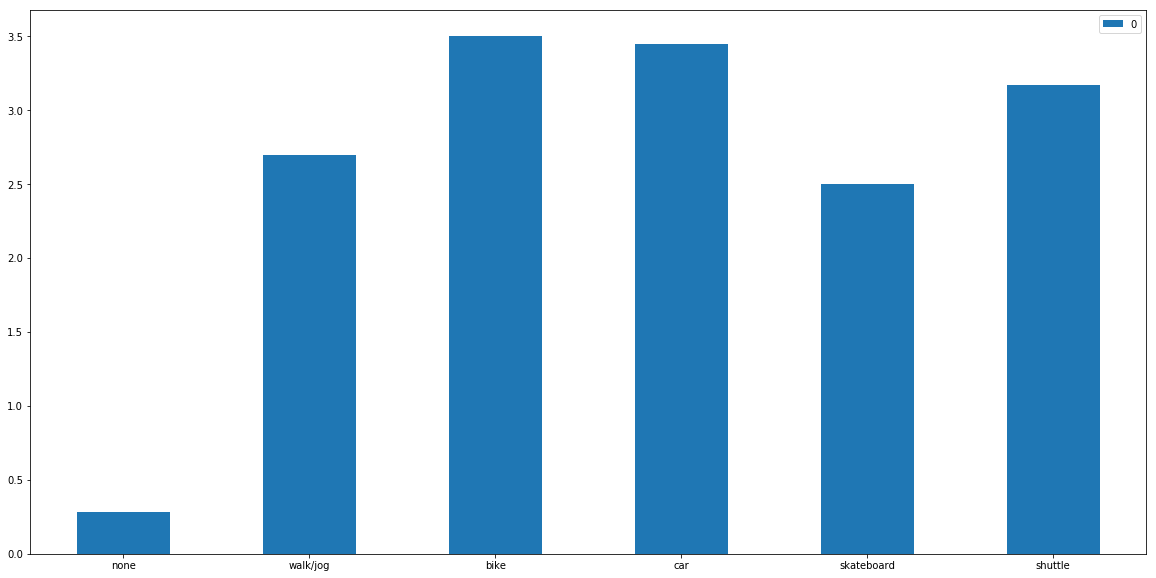

In [45]:
transport_on_freq = pd.DataFrame({none_freq, walk_freq, bike_freq, car_freq, skateboard_freq, shuttle_freq})
labels = ('none','walk/jog', 'bike', 'car', 'skateboard', 'shuttle')
ax = transport_on_freq.plot.bar(rot=0,figsize=(20,10))
y_pos = np.arange(len(labels))
plt.xticks(y_pos, labels)
plt.show()

### Gen_gym_locations vs On-campus-freq

In [46]:
def count_gyms(general_gyms):
    if (general_gyms is np.nan):
        return 0
    else:
        count = general_gyms.count(',')
        return count + 1

In [47]:
gen_gym = df
gen_gym['gen_gym_locations']
gen_gym['number_gyms'] = gen_gym['gen_gym_locations'].apply(count_gyms)

In [48]:
gen_gym['number_gyms'].value_counts()

1    31
2    30
3     8
0     7
4     1
Name: number_gyms, dtype: int64

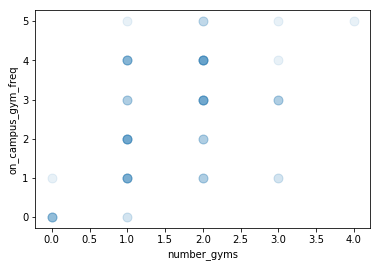

In [49]:
plt.scatter(gen_gym['number_gyms'], gen_gym['on_campus_gym_freq'],s=80, alpha=0.1)
plt.xlabel("number_gyms")
plt.ylabel("on_campus_gym_freq")
plt.show()

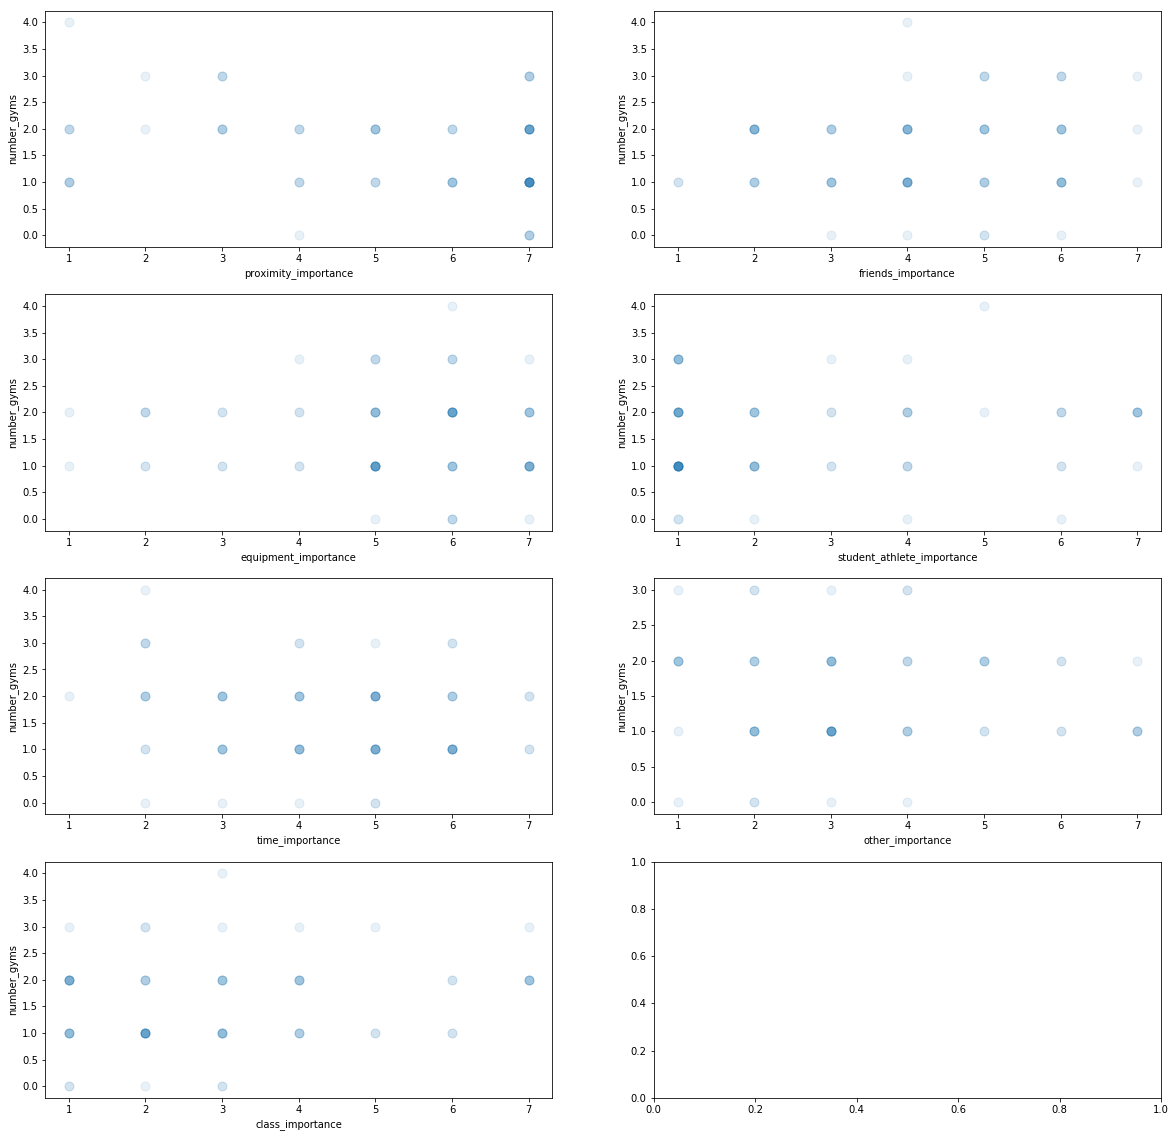

In [50]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,20))
axes[0][0].scatter(gen_gym['proximity_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[0][0].set_xlabel("proximity_importance")
axes[0][0].set_ylabel("number_gyms")

axes[1][0].scatter(gen_gym['equipment_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[1][0].set_xlabel("equipment_importance")
axes[1][0].set_ylabel("number_gyms")

axes[2][0].scatter(gen_gym['time_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[2][0].set_xlabel("time_importance")
axes[2][0].set_ylabel("number_gyms")

axes[3][0].scatter(gen_gym['class_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[3][0].set_xlabel("class_importance")
axes[3][0].set_ylabel("number_gyms")

axes[0][1].scatter(gen_gym['friends_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[0][1].set_xlabel("friends_importance")
axes[0][1].set_ylabel("number_gyms")

axes[1][1].scatter(gen_gym['student_athlete_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[1][1].set_xlabel("student_athlete_importance")
axes[1][1].set_ylabel("number_gyms")

axes[2][1].scatter(gen_gym['other_importance'], gen_gym['number_gyms'], s=80, alpha=0.1)
axes[2][1].set_xlabel("other_importance")
axes[2][1].set_ylabel("number_gyms")

plt.show()